In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from absl import logging
logging.set_verbosity(logging.ERROR)

In [2]:

dataset_url = 'https://www.cryptodatadownload.com/cdd/Gemini_BTCEUR_d.csv'
destination_file = 'Gemini_BTCEUR_d.csv'

response = requests.get(dataset_url)

if response.status_code == 200:
    with open(destination_file, 'wb') as file:
        file.write(response.content)
    print(f'Dataset downloaded successfully to {destination_file}')
else:
    print(f'Failed to download dataset. Status code: {response.status_code}')
    
csv_file_path = 'Gemini_BTCEUR_d.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path, skiprows=[0])
# Display the DataFrame


Dataset downloaded successfully to Gemini_BTCEUR_d.csv


In [3]:
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume EUR
0,1714521600000,2024-05-01 00:00:00,BTC/EUR,56390.86,57248.39,53157.30,53655.68,4.231182,227026.944731
1,1714435200000,2024-04-30 00:00:00,BTC/EUR,59719.37,59719.37,55500.00,56390.86,1.274757,71884.641265
2,1714348800000,2024-04-29 00:00:00,BTC/EUR,58841.90,59719.37,57100.00,59719.37,2.511821,150004.350951
3,1714262400000,2024-04-28 00:00:00,BTC/EUR,59334.81,62948.98,58841.90,58841.90,0.222209,13075.197992
4,1714176000000,2024-04-27 00:00:00,BTC/EUR,59721.59,59721.59,58541.92,59334.81,0.768410,45593.472626
...,...,...,...,...,...,...,...,...,...
1635,1603857600000,2020-10-28 04:00:00,BTC/EUR,0.00,11441.37,0.00,11153.76,0.471273,5256.460917
1636,1603771200000,2020-10-27 04:00:00,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000
1637,1603684800000,2020-10-26 04:00:00,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000
1638,1603598400000,2020-10-25 04:00:00,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000


In [4]:
columns_to_drop = ['symbol','unix', 'Volume EUR', 'Volume BTC', 'high', 'open', 'low']
df = df[df['close'] != 0]

df.drop(columns=columns_to_drop, inplace=True)
df

/tmp/ipykernel_33342/3768464653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


,date,close
0,2024-05-01 00:00:00,53655.68
1,2024-04-30 00:00:00,56390.86
2,2024-04-29 00:00:00,59719.37
3,2024-04-28 00:00:00,58841.90
4,2024-04-27 00:00:00,59334.81
...,...,...
1631,2020-11-01 04:00:00,11794.98
1632,2020-10-31 04:00:00,11902.44
1633,2020-10-30 04:00:00,11602.24
1634,2020-10-29 04:00:00,11605.42


/tmp/ipykernel_33342/3707028640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


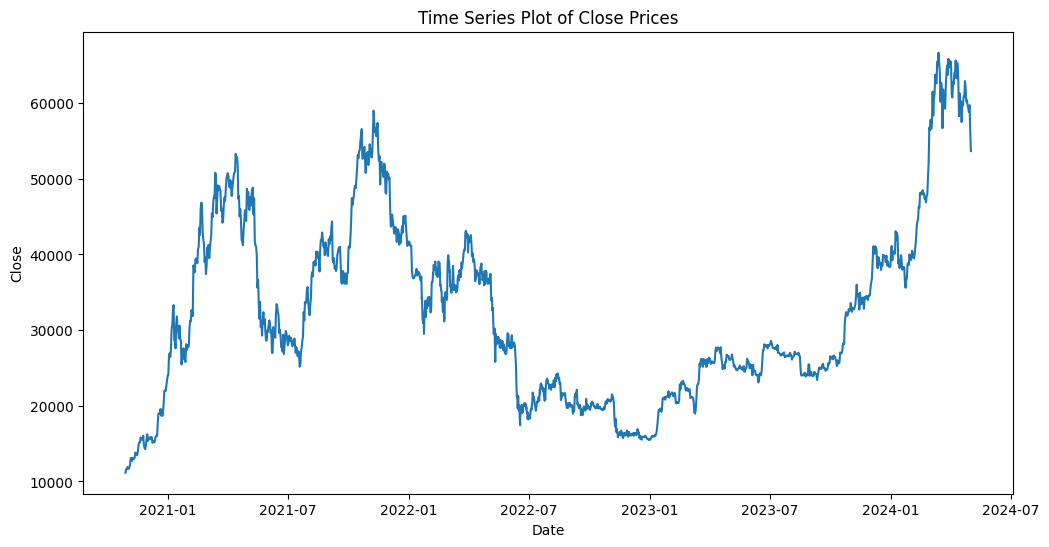

In [5]:
df['date'] = pd.to_datetime(df['date'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Time Series Plot of Close Prices')
plt.show()

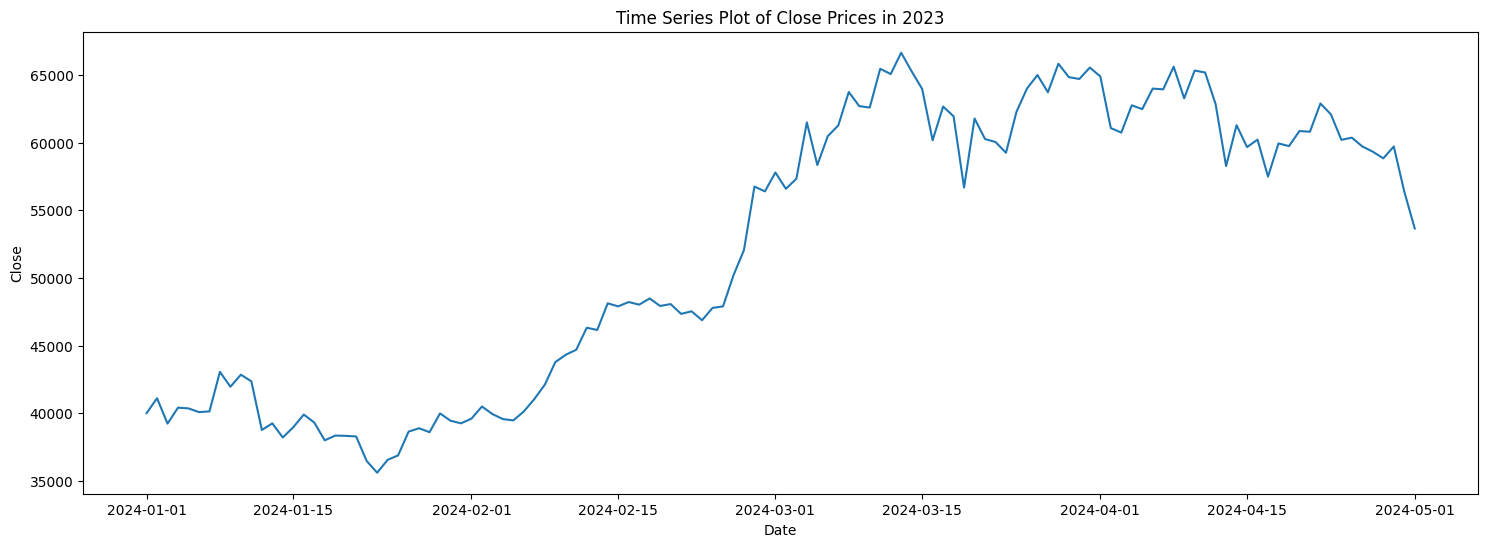

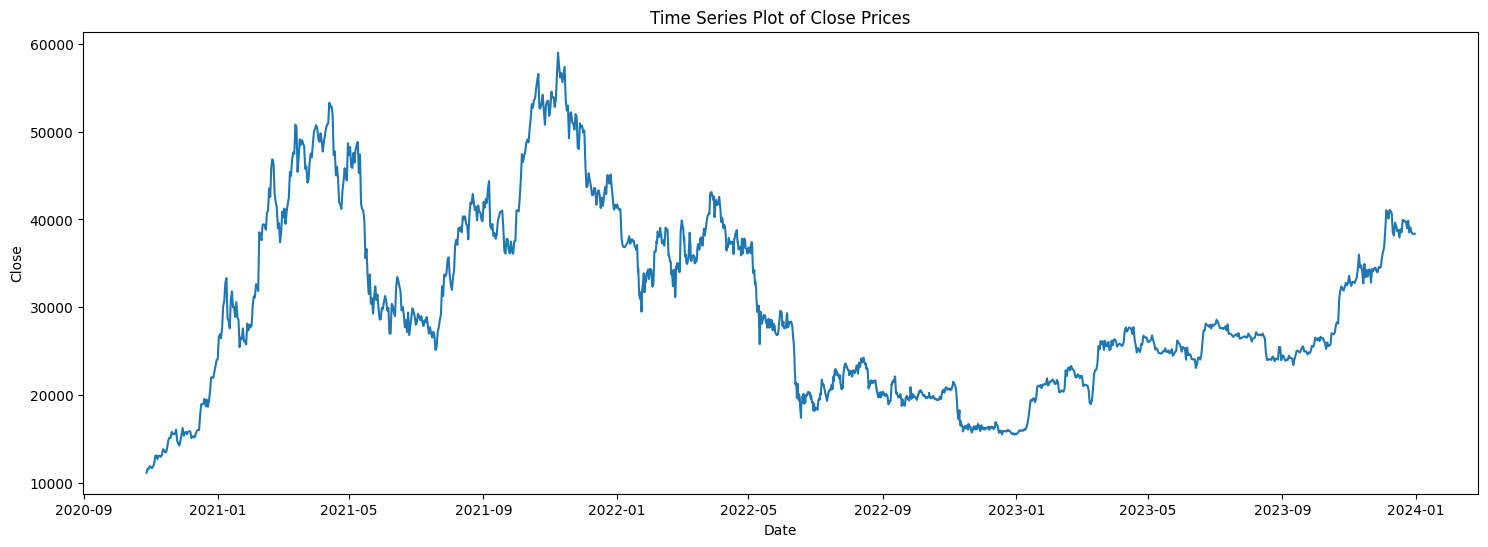

In [6]:
test_set = df[df['date'].dt.year == 2024]

# Training set
train_set = df[df['date'].dt.year != 2024]
# Plotting
plt.figure(figsize=(18, 6))
plt.plot(test_set['date'], test_set['close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Time Series Plot of Close Prices in 2023')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(train_set['date'], train_set['close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Time Series Plot of Close Prices')
plt.show()

In [16]:
valid = np.array(test_set['close'])
train = np.array(train_set['close'])

valid = valid[::-1]
train = train[::-1]

In [17]:
def plot_time_series(data):
    indices = np.arange(len(data))
    
    plt.figure(figsize=(10, 6))
    plt.plot(indices, data, label='Time Series Data')
    plt.title('Time Series Plot')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


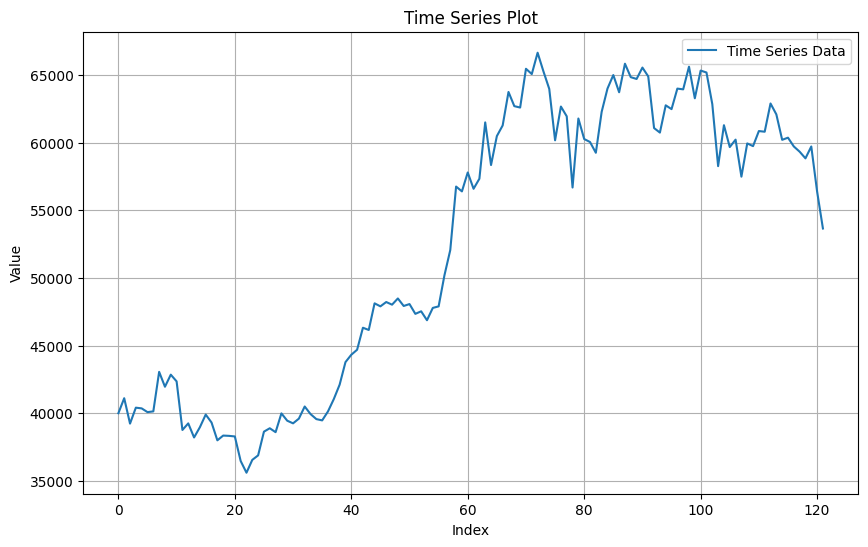

In [18]:
plot_time_series (valid)

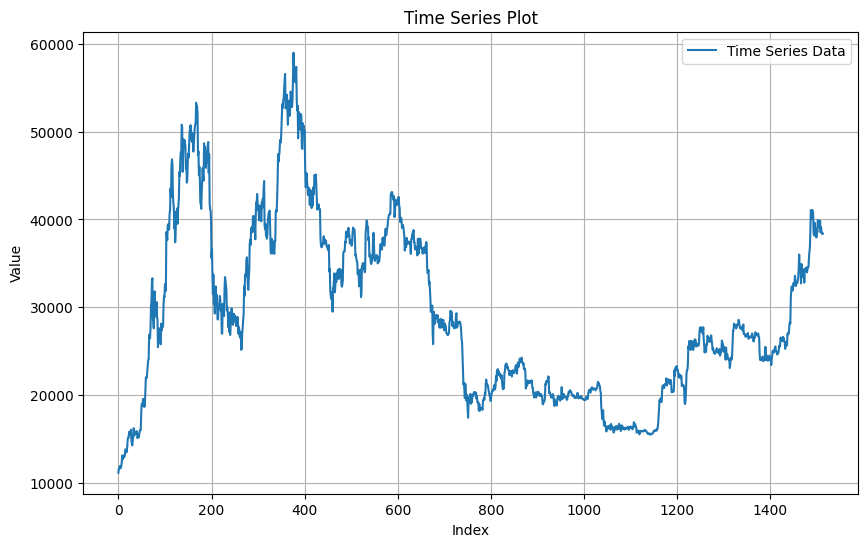

In [19]:
plot_time_series (train)

In [27]:
def normalize_data(train_data, valid_data, lower_percent, upper_percent):
    """
    Normalize training and validation data to a custom range where a certain percentage is mapped to values less than zero.
    
    Parameters:
    train_data (array-like): The training data to be normalized.
    valid_data (array-like): The validation data to be normalized.
    lower_percent (float): The percentage of the range to map to values less than zero.
    upper_percent (float): The percentage of the range to map to values greater than zero.
    
    Returns:
    tuple: A tuple containing the normalized training and validation data.
    """
    min_val = min(train_data)
    max_val = max(train_data)
    range_of_values = np.ptp(train_data) 
    min_val = min_val - range_of_values*5
    max_val = max_val + range_of_values*5
    normalized_train_data = [(x - min_val) / (max_val - min_val) for x in train_data]
    normalized_valid_data = [(x - min_val) / (max_val - min_val) for x in valid_data]
    return normalized_train_data, normalized_valid_data

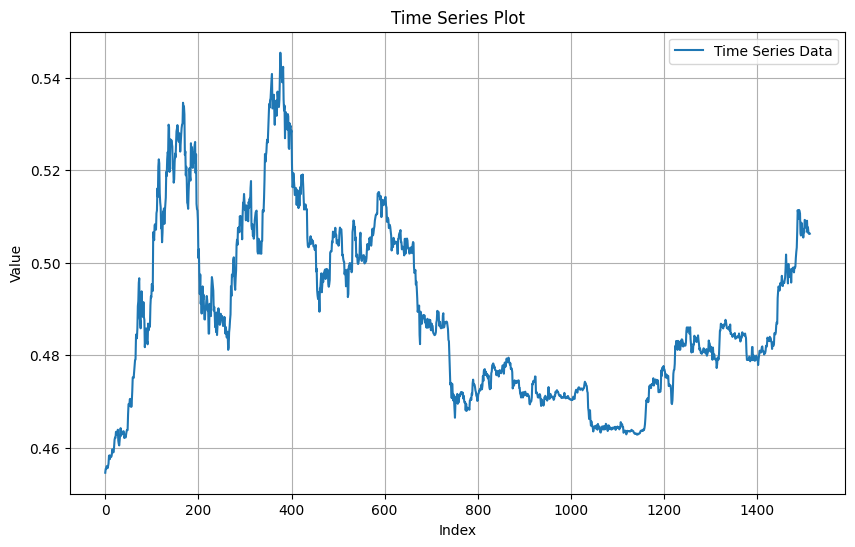

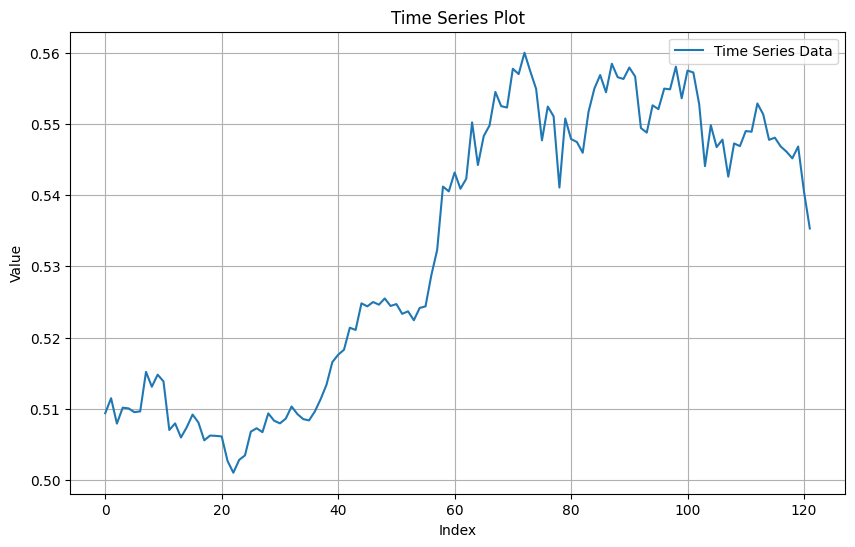

In [28]:
lower_percent = 5
upper_percent = 5

x_train_reshaped = train.reshape(-1, 1)
x_valid_reshaped = valid.reshape(-1, 1)

x_train_reshaped, x_valid_reshaped = normalize_data(x_train_reshaped, x_valid_reshaped, lower_percent , upper_percent)

plot_time_series(x_train_reshaped)
plot_time_series(x_valid_reshaped)

In [39]:
window_size = 30

x_train_window =[]
y_train_window =[]
x_valid_window =[]
y_valid_window =[]

x_train_reshaped = np.array(x_train_reshaped)
x_valid_reshaped = np.array(x_valid_reshaped)

for i in range (window_size, x_train_reshaped.shape[0]):
    x_train_window.append(x_train_reshaped[i-window_size:i, 0])
    y_train_window.append(x_train_reshaped[i, 0])



for i in range (window_size,x_valid_reshaped.shape[0] ):
  x_valid_window.append(x_valid_reshaped[i-window_size:i,0])
  y_valid_window.append(x_valid_reshaped[i,0])

X_train, y_train, X_valid, y_valid = np.array(x_train_window), np.array(y_train_window), np.array(x_valid_window), np.array(y_valid_window)

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.metrics import MeanAbsoluteError
from keras.callbacks import ModelCheckpoint
import itertools
import os
import pandas as pd
from tqdm import tqdm

# Define the hyperparameters you want to iterate over
activations = ['relu', 'tanh']
num_of_layers = [0, 1, 2, 3]
units = 50
dropout_rate = 0.2
epochs = 1000

# Loop over the combinations
for activation, num_layers in itertools.product(activations, num_of_layers):
    history_file_path = f'training_history_ANN_{num_layers}_{units}_{activation}.csv'
    if os.path.exists(history_file_path):
        print(f"Training history already exists for Activation={activation}, Num Layers={num_layers}. Skipping...")
        continue

    print(f"Training Neural Network: Activation={activation}, Num Layers={num_layers}")
    # Initialising the ANN model
    regressor = Sequential()

    # Adding input layer
    regressor.add(Dense(units=units, input_dim=X_train.shape[1], activation=activation))

    # Adding hidden layers
    for _ in range(num_layers):
        regressor.add(Dense(units=units, activation=activation))
        regressor.add(Dropout(dropout_rate))

    # Adding output layer
    regressor.add(Dense(units=1))

    # Compile the model with Adam optimizer and specific learning rate
    optimizer = Adam()
    regressor.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[MeanAbsoluteError()])

    # Define a ModelCheckpoint callback to save the best model
    checkpoint = ModelCheckpoint(f'best_model_ANN_{num_layers}_{units}_{activation}.keras', monitor='val_mean_absolute_error', mode='min', save_best_only=True)

    # Fitting the ANN to the Training set with the ModelCheckpoint callback
    progress_bar = tqdm(total=epochs, desc=f"Progress: Activation={activation}, Num Layers={num_layers}", position=0, leave=True)
    for epoch in range(epochs):
        history = regressor.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_valid, y_valid), verbose=0, callbacks=[checkpoint])
        progress_bar.update(1)  # Update the progress bar
        progress_bar.set_postfix(loss=history.history['loss'][0], val_loss=history.history['val_loss'][0])
    progress_bar.close()

    history_df = pd.DataFrame({
        'epoch': range(1, len(history.history['loss']) + 1),
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss'],
        'mean_absolute_error': history.history['mean_absolute_error'],
        'val_mean_absolute_error': history.history['val_mean_absolute_error']
    })
    history_df.to_csv(f'training_history_ANN_{num_layers}_{units}_{activation}.csv', index=False)


2024-05-02 21:52:50.325638: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 21:52:50.331154: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 21:52:50.400738: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 21:52:54.175241: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/p/pakrit/pytorchRL/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  s

Training Neural Network: Activation=relu, Num Layers=0


Progress: Activation=relu, Num Layers=0:  12%|█▏        | 124/1000 [00:21<02:28,  5.89it/s, loss=1.69e-5, val_loss=3.98e-5] 

KeyboardInterrupt: 